In [11]:
!pip3 install spacy

In [12]:
!pip3 install networkx pyvis

In [13]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [14]:
!pip install -U spacy

  Using cached spacy-3.4.3-cp38-cp38-win_amd64.whl (12.2 MB)
  Using cached thinc-8.1.5-cp38-cp38-win_amd64.whl (1.3 MB)

ERROR: Could not install packages due to an OSError: [WinError 5] Odmowa dostępu: 'C:\\Users\\user\\AppData\\Local\\Temp\\pip-uninstall-k9gkd39z\\backends\\linalg.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17


In [21]:

#!python -m spacy download en_core_web_sm
!python -m spacy download pl_core_news_md

# aby załadować bez błędów musiałam skopiować folder spacy z 
# C:\Users\user\anaconda3\pkgs\spacy-3.2.4-py38h9e3ed74_0\Lib\site-packages
# do C:\msys64\mingw64\bin

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[+] Download and installation successful
You can now load the package via spacy.load('pl_core_news_md')


In [36]:

# Load spacy English languague model
#NER = spacy.load("en_core_web_sm")

from spacy.lang.pl.examples import sentences 

NER = spacy.load("pl_core_news_md")
#NER = spacy.load("en_core_web_sm")


### Load books

In [88]:

import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]   #'./data/PanTadeusz.txt'


In [89]:
all_books

[<DirEntry 'PanTadeusz.txt'>]

In [90]:

book = all_books[0]
book_text = open(book, encoding='utf8').read()
book_doc = NER(book_text)
#book_text[:8]

In [91]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

### Load character names

In [95]:

# Read characters
character_df = pd.read_csv("characters.csv")

In [96]:
character_df

,character
0,Jacek
1,Robak
2,Tadeusz
3,Sędzia
4,Woźny
5,Podkomorzy
6,Wojski
7,Rejent
8,Asesor
9,Jankiel


In [97]:
character_df["value"] = 1
character_df

,character,value
0,Jacek,1
1,Robak,1
2,Tadeusz,1
3,Sędzia,1
4,Woźny,1
5,Podkomorzy,1
6,Wojski,1
7,Rejent,1
8,Asesor,1
9,Jankiel,1


In [43]:
# character2_df = character_df.groupby(["character_firstname"], sort=False, as_index=False).sum()
# character2_df.head(20)

### Get named entity list per sentence

In [98]:

sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]  #dla całego zdania może być kilka encji
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [99]:
sent_entity_df

,sentence,entities
0,"(Litwo, ,, Ojczyzno, moja![36, ])",[]
1,"(ty, jesteś, jak, zdrowie, ;, \n, Ile, cię, tr...",[]
2,"(Dziś, piękność, twą, w, całej, ozdobie, \n, W...",[]
3,"(\n\n , 5, , Panno, święta, ,, co, Jasn...","[Jasnej, Ostrej]"
4,"(Ty, ,, co, gród, zamkowy, \n, Nowogrodzki, oc...",[]
5,"(\n\n, Jak, mnie, dziecko, do, zdrowia, powróc...",[Bogu]
6,"(\n, Tymczasem, przenoś, moję, duszę, utęsknio...",[Niemnem]
7,"(\n\n , Śród, takich, pól, przed, laty, ,, nad...","[ruczaju[40], szlachecki[41]]"
8,"(\n, Dom, mieszkalny, niewielki, ,, lecz, zews...",[]
9,"(\n, Widać, ,, że, okolica, obfita, we, zboże,...",[smugów\nŚwiecą]


In [100]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character)] #gdy jest ród nazw charakterów
          

In [101]:
sent_entity_df['character_entities']=sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

In [102]:
# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)


,sentence,entities,character_entities
59,"(\n\n , 160, , Pan, Wojski, poznał, zda...",[Wojski],[Wojski]
62,"(Gdy, się, pan, Wojski, dosyć, napytał, ,, nab...",[Wojski],[Wojski]
67,"(\n\n , Pan, Wojski, z, Tadeuszem, idą, pod, l...","[Wojski, Tadeuszem]",[Wojski]
71,"(I, wnet, sierpy, ,, gromadnie, dzwoniące, \n\...",[Sędzia],[Sędzia]
73,"(\n , 205Tak, zwykł, mawiać, pan, Sędzia...",[Sędzia],[Sędzia]
75,"(Naprzód, dzieci, małe, \n, Z, dozorcą, ,, pot...","[Sędzia, Podkomorzy]","[Sędzia, Podkomorzy]"
84,"(\n\n, Wojski, z, woźnym[57, ])",[Wojski],[Wojski]
87,"(Pan, Wojski, się, krzywił, \n , 255I, p...","[Wojski, Sędziego]",[Wojski]
109,"(\n\n\n , Pan, Tadeusz, ,, choć, młodzik, ,, a...","[Tadeusz, gościa\nWysoko, Jegomościa]",[Tadeusz]
111,"(\n, I, Tadeusz, wzrok, stryja, ku, drzwiom, o...",[Tadeusz],[Tadeusz]


In [103]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

<ipython-input-103-8660bad94cad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [104]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities,character_entities
59,"(\n\n , 160, , Pan, Wojski, poznał, zda...",[Wojski],[Wojski]
62,"(Gdy, się, pan, Wojski, dosyć, napytał, ,, nab...",[Wojski],[Wojski]
67,"(\n\n , Pan, Wojski, z, Tadeuszem, idą, pod, l...","[Wojski, Tadeuszem]",[Wojski]
71,"(I, wnet, sierpy, ,, gromadnie, dzwoniące, \n\...",[Sędzia],[Sędzia]
73,"(\n , 205Tak, zwykł, mawiać, pan, Sędzia...",[Sędzia],[Sędzia]
...,...,...,...
3876,"(\n\n , Było, cymbalistów, wielu, ,, \n, Ale, ...","[Jankielu, Jankiel]",[Jankiel]
3879,"(Gdy, to, Zosia, widzi, ,, \n, Podbiega, ,, i,...",[Zosia],[Zosia]
3880,"(\n, Wszak, nieraz, przyrzekałeś, grać, na, me...","[Jankiel, Zosię]",[Jankiel]
3932,"(\n\n , Zosia, tańczy, wesoło, :, lecz, choć, ...",[Zosia],[Zosia]


### Create relationships

In [105]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other   ex: ['Geralt','Geralt']
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]): #do przedostatniego elementu
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b}) #relacja między dwoma sąsiadami

In [106]:

relationship_df = pd.DataFrame(relationships)

In [107]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Wojski,Sędzia
1,Wojski,Sędzia
2,Sędzia,Podkomorzy
3,Sędzia,Podkomorzy
4,Sędzia,Podkomorzy
5,Sędzia,Podkomorzy
6,Sędzia,Podkomorzy
7,Sędzia,Podkomorzy
8,Tadeusz,Asesor
9,Tadeusz,Asesor


In [108]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Sędzia,Wojski
1,Sędzia,Wojski
2,Podkomorzy,Sędzia
3,Podkomorzy,Sędzia
4,Podkomorzy,Sędzia
5,Podkomorzy,Sędzia
6,Podkomorzy,Sędzia
7,Podkomorzy,Sędzia
8,Asesor,Tadeusz
9,Asesor,Tadeusz


In [109]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [110]:

relationship_df.head(10)

,source,target,value
0,Sędzia,Wojski,22
1,Podkomorzy,Sędzia,11
2,Asesor,Tadeusz,9
3,Podkomorzy,Telimena,2
4,Telimena,Wojski,11
5,Robak,Tadeusz,22
6,Asesor,Robak,5
7,Sędzia,Tadeusz,24
8,Gerwazy,Hrabia,33
9,Gerwazy,Stolnik,18


### Graph analysis and visualization

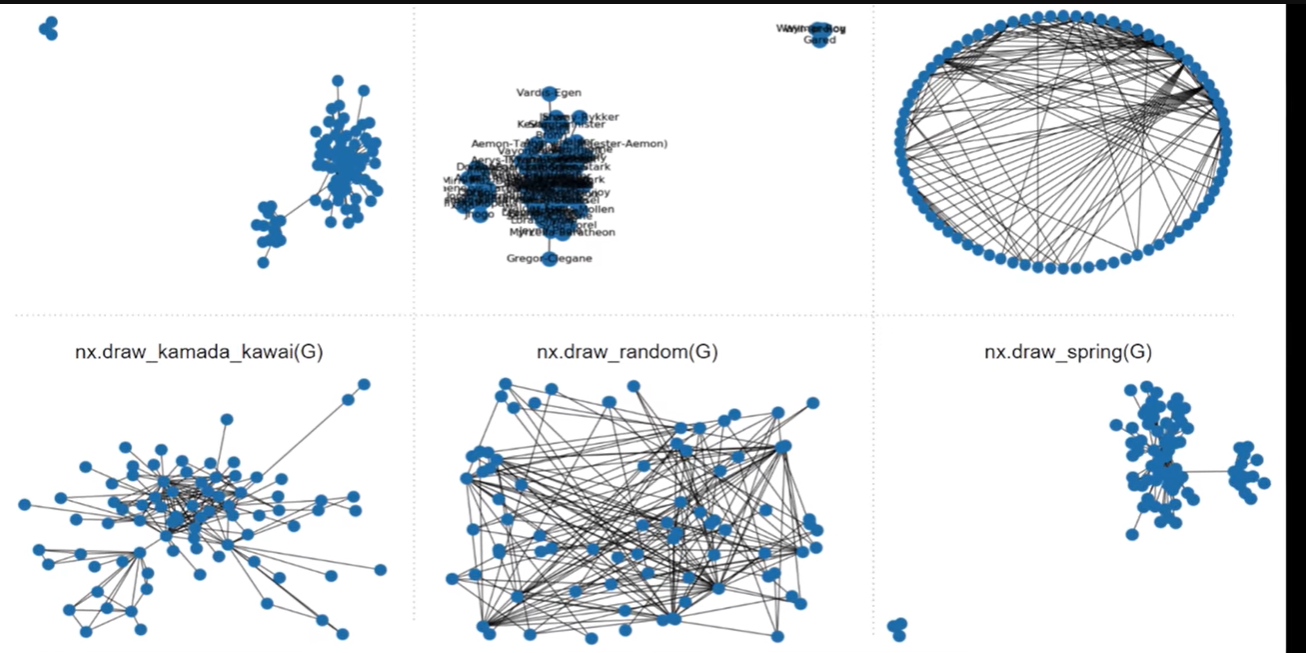

In [111]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

In [61]:
!pip install scipy

#### Graph visualization - Networkx

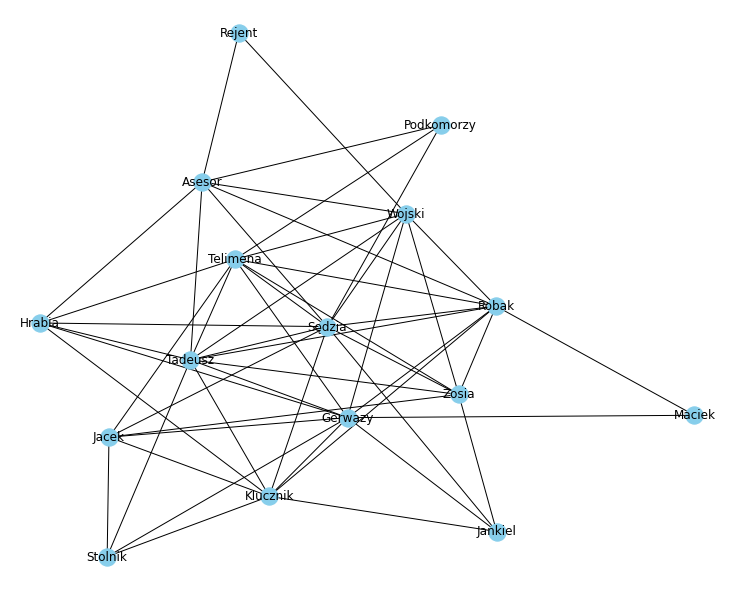

In [112]:

plt.figure(figsize=(10,8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

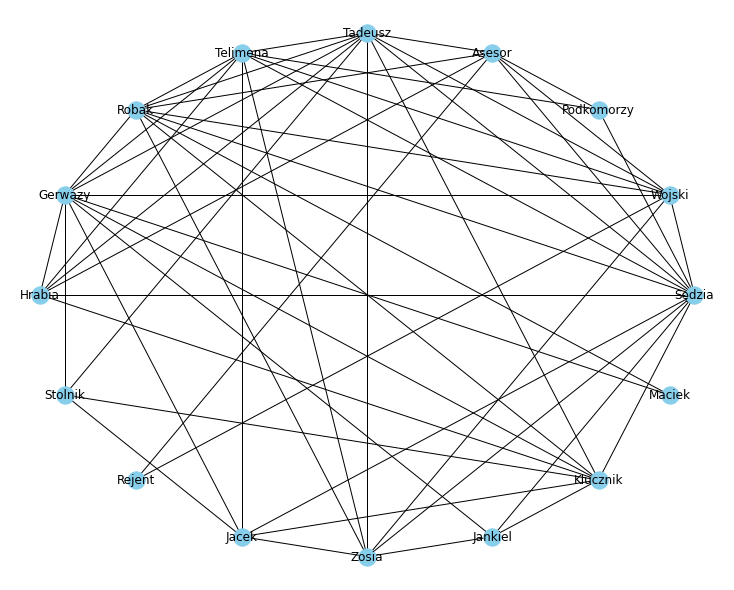

In [113]:
plt.figure(figsize=(10,8))
#pos = nx.kamada_kawai_layout(G)
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [114]:
dict(G.degree)

{'Sędzia': 11,
 'Wojski': 8,
 'Podkomorzy': 3,
 'Asesor': 7,
 'Tadeusz': 10,
 'Telimena': 9,
 'Robak': 9,
 'Gerwazy': 10,
 'Hrabia': 6,
 'Stolnik': 4,
 'Rejent': 2,
 'Jacek': 6,
 'Zosia': 7,
 'Jankiel': 4,
 'Klucznik': 8,
 'Maciek': 2}

In [116]:

from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("pan_tadeusz.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### The most important characters in The Pan Tadeusz

In [117]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Sędzia': 0.7333333333333333,
 'Wojski': 0.5333333333333333,
 'Podkomorzy': 0.2,
 'Asesor': 0.4666666666666667,
 'Tadeusz': 0.6666666666666666,
 'Telimena': 0.6,
 'Robak': 0.6,
 'Gerwazy': 0.6666666666666666,
 'Hrabia': 0.4,
 'Stolnik': 0.26666666666666666,
 'Rejent': 0.13333333333333333,
 'Jacek': 0.4,
 'Zosia': 0.4666666666666667,
 'Jankiel': 0.26666666666666666,
 'Klucznik': 0.5333333333333333,
 'Maciek': 0.13333333333333333}

<AxesSubplot:>

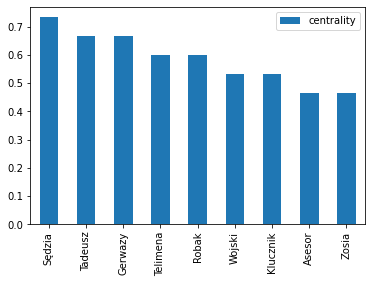

In [118]:
# Plot top 10 nodes
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")  #najważniejsze węzły

<AxesSubplot:>

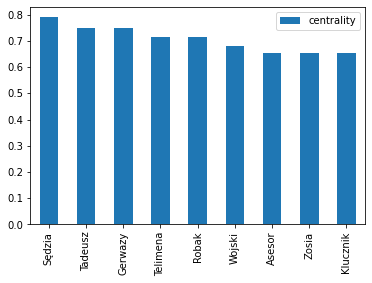

In [120]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [121]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
#nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection